In [82]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [83]:
data=pd.read_csv('crime_data.csv')

In [84]:
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# Heirarchical Clustering

In [85]:
def norm_func(data):
    return data-data.min()/(data.max()-data.min())

In [86]:
def_norm=norm_func(data.iloc[:,1:])

In [87]:
def_norm

,Murder,Assault,UrbanPop,Rape
0,13.151807,235.84589,57.457627,21.01137
1,9.951807,262.84589,47.457627,44.31137
2,8.051807,293.84589,79.457627,30.81137
3,8.751807,189.84589,49.457627,19.31137
4,8.951807,275.84589,90.457627,40.41137
5,7.851807,203.84589,77.457627,38.51137
6,3.251807,109.84589,76.457627,10.91137
7,5.851807,237.84589,71.457627,15.61137
8,15.351807,334.84589,79.457627,31.71137
9,17.351807,210.84589,59.457627,25.61137


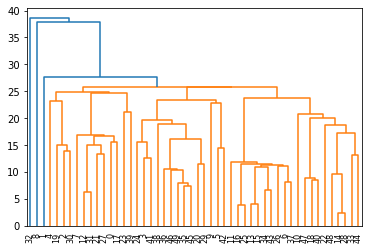

In [88]:
dendrogram = sch.dendrogram(sch.linkage(def_norm, method='single'))

In [89]:

hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [90]:
y_hc = hc.fit_predict(def_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [91]:
def_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     float64
 2   UrbanPop  50 non-null     float64
 3   Rape      50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [92]:
def_norm['clusterid']=Clusters

In [93]:
def_norm.groupby('clusterid').mean()

,Murder,Assault,UrbanPop,Rape
clusterid,,,,
0,7.419892,161.611848,65.500180,20.430518
1,12.951807,336.845890,44.457627,15.911370
2,15.351807,334.845890,79.457627,31.711370
3,9.951807,262.845890,47.457627,44.311370


# K-Means Clustering

In [94]:
crimekmeandata=data

In [95]:
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crimekmeandata.iloc[:,1:])

In [96]:
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


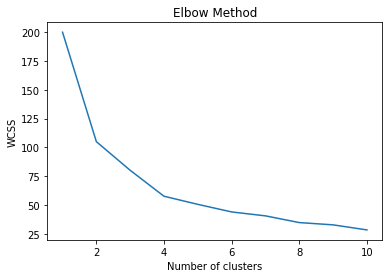

In [68]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [69]:
crimedata=KMeans(n_clusters=4,random_state=0)
crimedata.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=0)

In [70]:
crimedata.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [71]:
crimekmeandata['clusterId']=crimedata.labels_

In [72]:
crimekmeandata.groupby('clusterId').mean().reset_index()

,clusterId,Murder,Assault,UrbanPop,Rape
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


# DBScan

In [73]:
dbdata=data

In [74]:
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(dbdata.iloc[:,1:])

In [75]:
scaled_crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.62086791],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -0.24219865],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.24219865],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  1.62086791],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.24219865],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.24219865],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -1.17373193],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -1.17373193],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.24219865],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.62086791],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -1.17373193],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.68933463],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -0.24219865],
       [-0.13637203, -0.70012057, -0.0

In [76]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(scaled_crime_df)

DBSCAN(eps=0.8, min_samples=6)

In [77]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [78]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [79]:
dbdata['clusterid']=dbscan.labels_

In [48]:
dbdata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


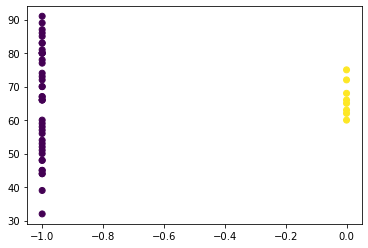

In [50]:
plt.scatter(dbdata['clusterid'],dbdata['UrbanPop'], c=dbscan.labels_) 